<a href="https://colab.research.google.com/github/mohammadalaeifar/SARIMAX/blob/main/SARIMAX%20Comparison%20with%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

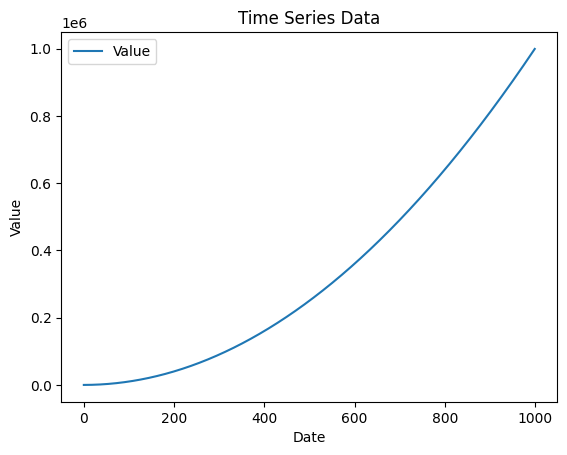

ADF Statistic: -1.0343625929540556
p-value: 0.7405259806548131
Critical Values:
   1%: -3.4370062675076807
Critical Values:
   5%: -2.8644787205542492
Critical Values:
   10%: -2.568334722615888


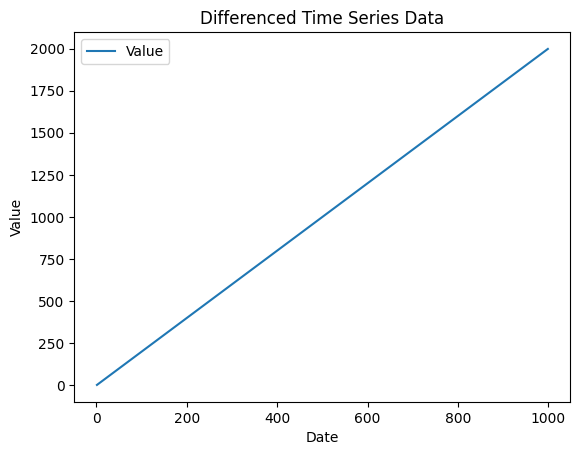

ADF Statistic: -7.56194937618537
p-value: 2.9938941433740185e-11
Critical Values:
   1%: -3.4370266558635914
Critical Values:
   5%: -2.864487711945291
Critical Values:
   10%: -2.5683395116993872


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                  999
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2116.533
Date:                Wed, 21 Jun 2023   AIC                           4237.067
Time:                        08:53:29   BIC                           4246.880
Sample:                             0   HQIC                          4240.797
                                - 999                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   2.01e-06   4.97e+05      0.000       1.000       1.000
sigma2         3.9997   5.07e-13   7.89e+12      0.000       4.000       4.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


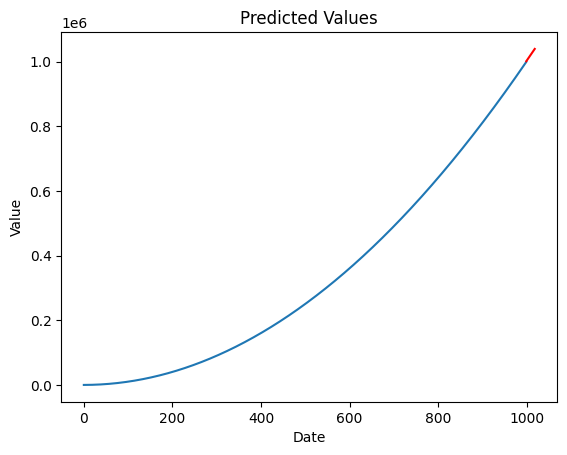

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_91 (LSTM)              (None, 250, 50)           10400     
                                                                 
 dropout_91 (Dropout)        (None, 250, 50)           0         
                                                                 
 lstm_92 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_92 (Dropout)        (None, 50)                0         
                                                                 
 dense_45 (Dense)            (None, 20)                1020      
                                                                 
Total params: 31,620
Trainable params: 31,620
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
4/4 [==============================] -

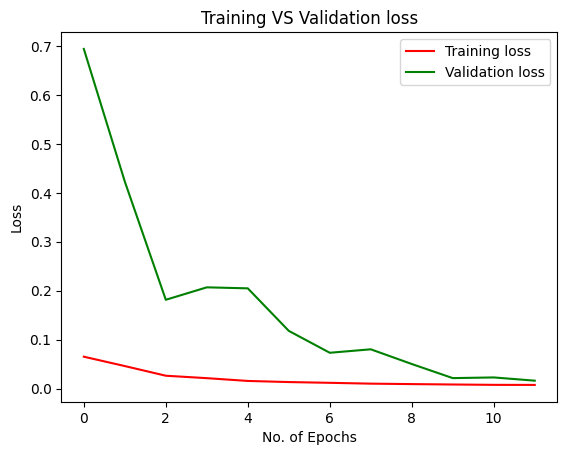

1/1 [==============================] - 1s 556ms/step


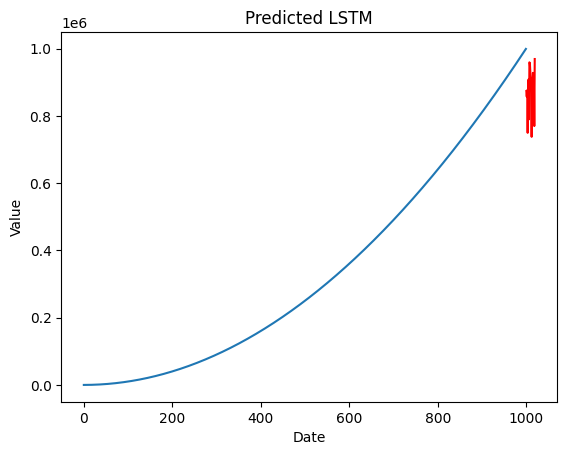

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import numpy as np # Load the data i


import math
def tst(num=1000):
    arr=[]
    for i in range(0,num):
      arr.append(i*i+i)
    return arr


n_lookback=250
n_forecast=20
def create_sequence(dataset ):
     X = []
     Y = []
     for i in range(n_lookback, len(dataset) - n_forecast + 1):
        X.append(dataset[i - n_lookback: i])
        Y.append(dataset[i: i + n_forecast])

     X = np.array(X)
     Y = np.array(Y)

     return(X,Y)





dtmp=tst()


df=pd.DataFrame(data=dtmp,columns=['Value'])
df['Date']=range(0,len(dtmp))
df=df[['Date','Value']]
df=df.set_index('Date')




#df = yf.download(coin_,  start='2022-01-01', end=dt.now() , interval=interval_) #data = pd.read_csv('data.csv', index_col='Date', parse_dates=True)

# Set the frequency of the index to monthly #
#data = data.resample('M').asfreq()
data=df
data.dropna().astype (float)

# Plot the data
data.plot()
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Check the stationarity of the time series
result = adfuller(data['Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}: {value}')

# Apply first-order differencing to make the time series stationary
diffs = data.diff().dropna()

# Plot the differenced data
diffs.plot()
plt.title('Differenced Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()
##-----------------------------------------------------------------------------------------
# Check the stationarity of the differenced time series
result = adfuller(diffs['Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}: {value}')

# Define the SARIMAX model
model = SARIMAX(endog=diffs, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))

# Fit the SARIMAX model
results = model.fit()

# Print the model summary
print(results.summary())

# Make predictions for the next 100 periods
forecast = results.forecast(steps=n_forecast)

# Convert the differenced forecast back to the original scale
last_value = data.iloc[-1]['Value']
forecast = forecast.cumsum() + last_value

# Plot the predicted values
plt.plot(df['Value'])
plt.plot(forecast, color='red')
plt.title('Predicted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

#-------------------------LSTM

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler=scaler.fit(df)
dft=scaler.transform(df)

training_size = round(len(dft) * 0.7)
train_data = dft[:training_size]
test_data = dft[training_size:]

X,Y=create_sequence(train_data)
Xtest,Ytest=create_sequence(test_data)
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, Bidirectional


model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.4))
model.add(LSTM(units=50))
model.add(Dropout(0.4))
model.add(Dense(n_forecast))

model.compile(loss='mean_squared_error', metrics=['mean_absolute_error'], optimizer='adam')
model.summary()
history=model.fit(X, Y, epochs=12, batch_size=128, verbose=1, validation_data=(Xtest,Ytest))

plt.plot(history.history['loss'], 'r', label='Training loss')
plt.plot(history.history['val_loss'], 'g', label='Validation loss')
plt.title('Training VS Validation loss')
plt.xlabel('No. of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


X_ = dft[- n_lookback:].reshape(1,-1)

Y_=model.predict(X_)

YP=scaler.inverse_transform(Y_)

YP=pd.DataFrame(data=YP.T,columns=["Value"])
YP['Date']=range(len(dtmp),len(dtmp)+n_forecast)
YP=YP.set_index('Date')
# Convert the differenced forecast back to the original scale

# Plot the predicted values
plt.plot(df['Value'])
plt.plot(YP, color='red')
plt.title('Predicted LSTM')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()


